### Numerical part

#### N1 

The aim of this study is to construct the regression model which can
explain how fuel consumption (first variable, ”mpg”) depends on other
numeric characteristics of the car (variables 3-7).

Prepare the data for construction of regression dependences between fuel consumption and displacement (variable 3): find the
mean fuel consumption between the cars with the same displacement. Further analysis should be provided with these new data.

In [42]:
mpg <- mtcars[, 1]
disp <- mtcars[, 3]
x <- unique(disp)
y <- sapply(unique(disp), function(z) {
    mean(mpg[which(disp == z)])
})

Fit the supsmu (Super Smoother) model describing the dependence
between fuel consumption (as y-variable) and displacement (as x-
variable). Construct the estimators
-  under various choices of span (0.05, 0.2, 0.5) parameter,
- with span chosed by cross-validation and bass (1,2,.., 10) parameters.

Find the best model in the sense that the mean-squared error is
minimal.

In [2]:
library(np)

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-10)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]


In [48]:
mse <- c()
span <- c()
bass <- c()
for (i in c(0.05, 0.2, 0.5)) {
    model <- supsmu(x, y, span = i)
    y_hat <- rep(0, length(x))
    for (k in 1:length(x)) {
        y_hat[k] <- model$y[model$x == x[k]]
    }
    mse <- c(mse, mean((y - y_hat)^2))
    span <- c(span, i)
    bass <- c(bass, NA)
}
for (j in 1:10) {
    model <- supsmu(x, y, span = "cv", bass = j)
    y_hat <- rep(0, length(x))
    for (k in 1:length(x)) {
        y_hat[k] <- model$y[model$x == x[k]]
    }
    mse <- c(mse, mean((y - y_hat)^2))
    span <- c(span, "cv")
    bass <- c(bass, j)
}

In [49]:
min(mse)
span[which.min(mse)]
bass[which.min(mse)]

[1] 3.846386

[1] "0.05"

[1] NA

For the same variables, fit the kernel regression under various choices
of kernels (Gaussian, Epanechnikov), and various methods for band-
width selection (Akaike criterion, least-squares cross-validation).
Find the best model in the sense that the mean-squared error is
minimal.

In [50]:
mse <- c()
ker <- c()
bw <- c()
for (i in c("gaussian", "epanechnikov")) {
    for (j in c("cv.aic", "cv.ls")) {
        model <- npreg(txdat = x, tydat = y, ckertype = i, bwmethod = j)
        y_hat <- fitted(model)
        mse <- c(mse, mean((y - y_hat)^2))
        ker <- c(ker, i)
        bw <- c(bw, j)
    }
}

In [51]:
min(mse)
ker[which.min(mse)]
bw[which.min(mse)]

[1] 3.202961

[1] "gaussian"

[1] "cv.ls"

For the same variables, fit the projection estimates to the basis of
Legendre polynomials with the number of basis functions varying
from 1 to 4. Find the best model in the sense that the mean-squared
error is minimal.

In [8]:
library('orthopolynom')

Loading required package: polynom


In [52]:
A <- min(x)
B <- max(x)
x2 <- 2 * (x - A)/(B - A) - 1
mse <- c()
for (J in 1:4) {
    LP <- legendre.polynomials(J, normalized = T)
    leg <- matrix(unlist(polynomial.values(polynomials = LP, x = x2)), ncol = J + 
        1, byrow = F)
    coef <- colMeans(leg * y)
    y_hat <- 2 * leg %*% coef
    mse <- c(mse, mean((y - y_hat)^2))
}

In [57]:
min(mse)
which.min(mse)

[1] 136.3438

[1] 1

Repeat the steps (i), (ii), (iii), (iv) with other 4 variables (variables
4-7) instead of ”disp”. As the result, provide a table, which sum-
marizes the information about the best models for each variable.

In [85]:
mses_all <- method_all <- params_all <- c()

for (var in 3:7) {
    mpg <- mtcars[, 1]
    disp <- mtcars[, var]
    x <- unique(disp)
    y <- sapply(unique(disp), function(z) {
        mean(mpg[which(disp == z)])
    })
    mse <- mses <- span <- bass <- method <- params <- c()
    for (i in c(0.05, 0.2, 0.5)) {
        model <- supsmu(x, y, span = i)
        y_hat <- rep(0, length(x))
        for (k in 1:length(x)) {
            y_hat[k] <- model$y[model$x == x[k]]
        }
        mse <- c(mse, mean((y - y_hat)^2))
        span <- c(span, i)
        bass <- c(bass, NA)
    }
    for (j in 1:10) {
        model <- supsmu(x, y, span = "cv", bass = j)
        y_hat <- rep(0, length(x))
        for (k in 1:length(x)) {
            y_hat[k] <- model$y[model$x == x[k]]
        }
        mse <- c(mse, mean((y - y_hat)^2))
        span <- c(span, "cv")
        bass <- c(bass, j)
    }
    mses <- c(mses, min(mse))
    method <- c(method, "supsmu")
    params <- c(params, paste("span:", toString(span[which.min(mse)]), ", bass:", 
        toString(bass[which.min(mse)])))
    
    mse <- c()
    ker <- c()
    bw <- c()
    for (i in c("gaussian", "epanechnikov")) {
        for (j in c("cv.aic", "cv.ls")) {
            model <- npreg(txdat = x, tydat = y, ckertype = i, bwmethod = j)
            y_hat <- fitted(model)
            mse <- c(mse, mean((y - y_hat)^2))
            ker <- c(ker, i)
            bw <- c(bw, j)
        }
    }
    
    mses <- c(mses, min(mse))
    method <- c(method, "kernel")
    params <- c(params, paste("kernel:", ker[which.min(mse)], ", bw:", bw[which.min(mse)]))
    
    A = min(x)
    B = max(x)
    x2 = 2 * (x - A)/(B - A) - 1
    mse <- c()
    for (J in 1:4) {
        LP <- legendre.polynomials(J, normalized = T)
        leg <- matrix(unlist(polynomial.values(polynomials = LP, x = x2)), ncol = J + 
            1, byrow = F)
        coef <- colMeans(leg * y)
        y_hat <- 2 * leg %*% coef
        mse <- c(mse, mean((y - y_hat)^2))
    }
    
    mses <- c(mses, min(mse))
    method <- c(method, "legendre")
    params <- c(params, paste("n_basis:", toString(which.min(mse))))
    
    mses_all <- c(mses_all, min(mses))
    method_all <- c(method_all, method[which.min(mses)])
    params_all <- c(params_all, params[which.min(mses)])
    
}

In [86]:
data.frame(3:7, colnames(mtcars)[3:7], mses_all, method_all, params_all)

X3.7,colnames.mtcars..3.7.,mses_all,method_all,params_all
<int>,<fct>,<dbl>,<fct>,<fct>
3,disp,3.202961,kernel,"kernel: gaussian , bw: cv.ls"
4,hp,7.737210,kernel,"kernel: gaussian , bw: cv.ls"
5,drat,13.969419,supsmu,"span: cv , bass: 1"
6,wt,5.216393,supsmu,"span: 0.2 , bass: NA"
7,qsec,14.920538,supsmu,"span: 0.05 , bass: NA"


Based on the results obtained on the step (v), the 2 variables that  are at most useful for describing the fuel consumption are disp and wt, since with their help we can construct the model describing mpg that has the smallest mean-squared error. Construct the multivariate LOESS
estimator based on these 2 variables. Plot the corresponding 3-
dimensional graph.

In [89]:
library('fANCOVA')

fANCOVA 0.5-1 loaded


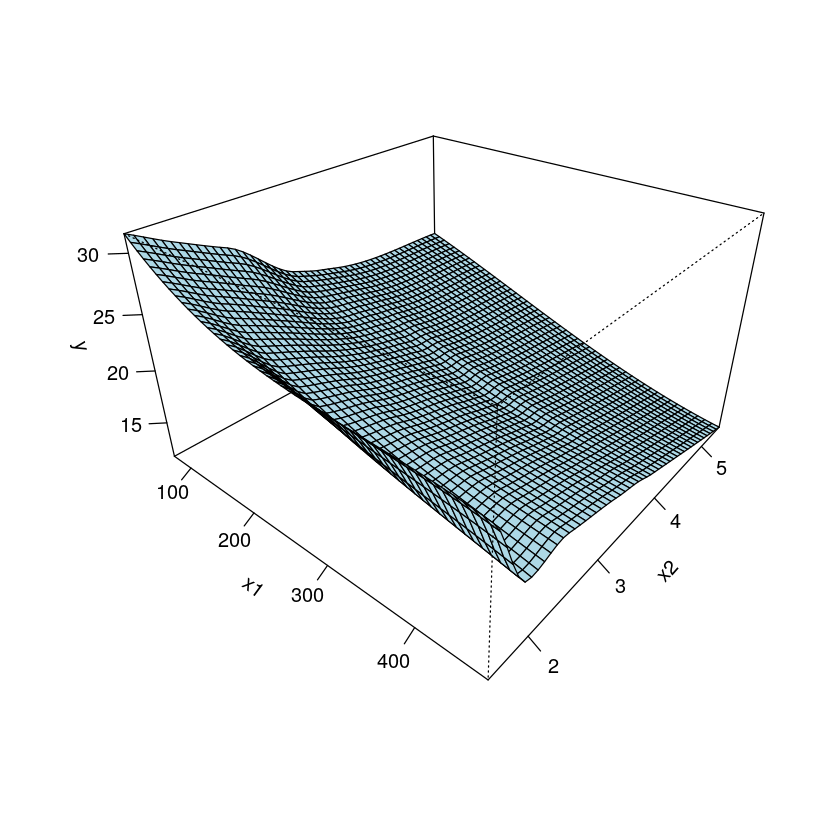

In [92]:
L <- loess.as(cbind(mtcars[["disp"]], mtcars[["wt"]]), mtcars[["mpg"]], plot = T)

In [94]:
summary(L)

Call:
loess(formula = y ~ x1 + x2, data = data.bind, span = span1, 
    degree = degree, family = family)

Number of Observations: 32 
Equivalent Number of Parameters: 4.36 
Residual Standard Error: 2.494 
Trace of smoother matrix: 5.5  (exact)

Control settings:
  span     :  0.7723997 
  degree   :  1 
  family   :  gaussian
  surface  :  interpolate	  cell = 0.2
  normalize:  TRUE
 parametric:  FALSE FALSE
drop.square:  FALSE FALSE 

For the same variables as in (vi) construct the linear model. Com-
pare the results with the results obtained on the previous step.

In [97]:
L2 <- lm(mpg ~ disp + wt, data = mtcars)
summary(L2)


Call:
lm(formula = mpg ~ disp + wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4087 -2.3243 -0.7683  1.7721  6.3484 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.96055    2.16454  16.151 4.91e-16 ***
disp        -0.01773    0.00919  -1.929  0.06362 .  
wt          -3.35082    1.16413  -2.878  0.00743 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.917 on 29 degrees of freedom
Multiple R-squared:  0.7809,	Adjusted R-squared:  0.7658 
F-statistic: 51.69 on 2 and 29 DF,  p-value: 2.744e-10


Standard error of residuals is slightly  greater for linear model. Both of regressors chosen with the help of nonparametric regression are significant on 10% level. 

#### N2

Consider the model
$$Y_i = \sin(2X_i ) + \epsilon_i$$ 
where $X_i \sim U [0,1]$ i.i.d.,
and $\epsilon_i \sim N(0,05)$ i.i.d.

Simulate the data from this model (say, 100 points) and implement the
analogue of the LOESS estimator, but with averaging among the k near-
est neighbours. Namely, the algorithm consists of the following steps:

In [170]:
N <- 100
xi1 <- runif(N, min = 0, max = 1)
eps <- rnorm(N, sd = 0.05)
y <- sin(2 * xi1) + eps
df  <-  cbind(xi1, y)

1. Fix some natural k (e.g., k = 5);

In [171]:
k <- 5

2. For any point X i reorder the values:
$$|X_{(1)}^i - X_i | \leq |X_{(2)}^i - X_i | \leq ... \leq |X_{(n)}^i - X_i|$$

3. Define the estimate
$$\hat{f}_n(X_i) = \frac{1}{k} \sum_{j=1}^k Y^i_{(j)}$$ 
where $Y_{(j)}$ is the true value at the point $X^i_{(j)}$
Plot the graph of $\hat{f}_n$
together with the points $(X_i, Y_i)$.

In [172]:
y_hat  <- c()
for (i in 1:N){
    y_hat  <-  c(y_hat, 1/k * sum(df[,2][order(abs(df[,1] - df[i,1]))][1:k]))
}

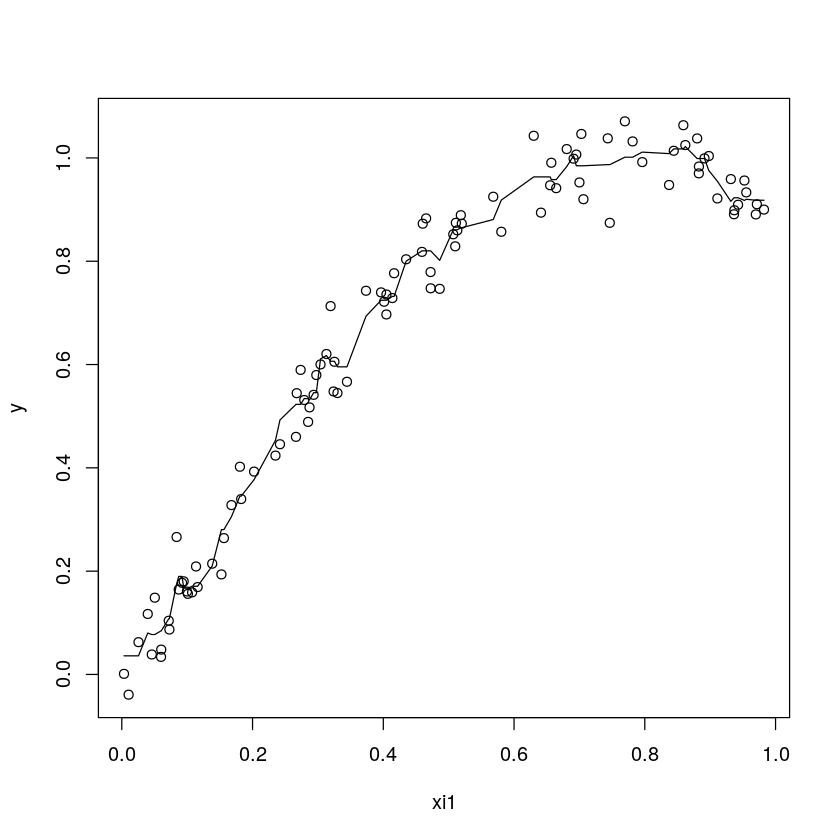

In [173]:
plot(xi1, y)
lines(sort(xi1), y_hat[order(xi1)])

4. For any $i = 1..n$, calculate the errors
$$e_i = \hat{f}_n (X_i) - Y_i$$
and define
$$\delta_i = B(e_i ) $$

In [174]:
er  <-  y_hat-y

In [175]:
errs  <-  c()
errs  <-  c(errs, mean(er^2))

In [176]:
delta  <-  (1-abs(er))^4

In [177]:
for (i in 1:length(delta)){
    if (delta[i] >= 1){
        delta[i]  <-  0
    }
}

5. Provide calculations on step 3 but with k varying for different points $i$.

6. Repeat steps 4-5 several times (e.g., 10 times).

In [178]:
for (j in 1:10) {
    y_hat <- c()
    for (i in 1:N) {
        ki <- round(k/delta[i])
        y_hat <- c(y_hat, 1/ki * sum(df[, 2][order(abs(df[, 1] - df[i, 1]))][1:ki]))
    }
    er <- y_hat - y
    errs <- c(errs, mean(er^2))
    delta <- (1 - abs(er))^4
    for (s in 1:length(delta)) {
        if (delta[s] >= 1) {
            delta[s] <- 0
        }
    }
}

In [179]:
errs
order(errs)

[1] 0.001678689 0.001851634 0.001907541 0.001854623 0.001907541 0.001854623
 [7] 0.001907541 0.001854623 0.001907541 0.001854623 0.001907541

[1]  1  2  4  6  8 10  3  5  7  9 11

The steps 4-6 does not improve the quality of the estimator
for the considered data.